In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [7]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 31.87 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [15]:
import os
main_dir="/content/datasets/Data"
train_dir=os.path.join(main_dir,'train')
test_dir=os.path.join(main_dir,'test')
train_covid_dir=os.path.join(train_dir,'COVID19')
train_normal_dir=os.path.join(train_dir,'NORMAL')
test_covid_dir=os.path.join(test_dir,'COVID19')
test_normal_dir=os.path.join(test_dir,'NORMAL')



In [16]:
#print the filenames
train_covid_names=os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names=os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names=os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(366).jpg', 'COVID19(117).jpg', 'COVID19(538).jpg', 'COVID19(322).jpg', 'COVID-19 (1).jpeg', 'COVID-19 (31).jpeg', 'COVID19(431).jpg', 'COVID19(214).jpg', 'COVID19(361).jpg', 'COVID19(110).jpg']
['NORMAL(89).jpg', 'NORMAL(469).jpg', 'NORMAL(328).jpg', 'NORMAL(864).jpg', 'NORMAL(472).jpg', 'NORMAL(885).jpg', 'NORMAL(162).jpg', 'NORMAL(1325).jpg', 'NORMAL(1234).jpg', 'NORMAL(1122).jpg']
['COVID19(505).jpg', 'COVID-19 (809).jpg', 'COVID19(410).jpg', 'COVID19(285).jpg', 'COVID19(423).jpg', 'COVID19(499).jpg', 'COVID19(385).jpg', 'COVID-19 (831).jpg', 'COVID-19 (313).jpg', 'COVID19(490).jpg']
['NORMAL(9).jpg', 'NORMAL(1201).jpg', 'NORMAL(393).jpg', 'NORMAL(42).jpg', 'NORMAL(154).jpg', 'NORMAL(477).jpg', 'NORMAL(1537).jpg', 'NORMAL(540).jpg', 'NORMAL(509).jpg', 'NORMAL(1292).jpg']


In [17]:
print("Total images present in the training set:",len(train_covid_names+train_normal_names))
print("Total images present in the testing set:",len(test_covid_names+test_normal_names))

Total images present in the training set: 1811
Total images present in the testing set: 484


['/content/datasets/Data/train/COVID19/COVID19(366).jpg', '/content/datasets/Data/train/COVID19/COVID19(117).jpg', '/content/datasets/Data/train/COVID19/COVID19(538).jpg', '/content/datasets/Data/train/COVID19/COVID19(322).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (1).jpeg', '/content/datasets/Data/train/COVID19/COVID-19 (31).jpeg', '/content/datasets/Data/train/COVID19/COVID19(431).jpg', '/content/datasets/Data/train/COVID19/COVID19(214).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(89).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(469).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(328).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(864).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(472).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(885).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(162).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1325).jpg']


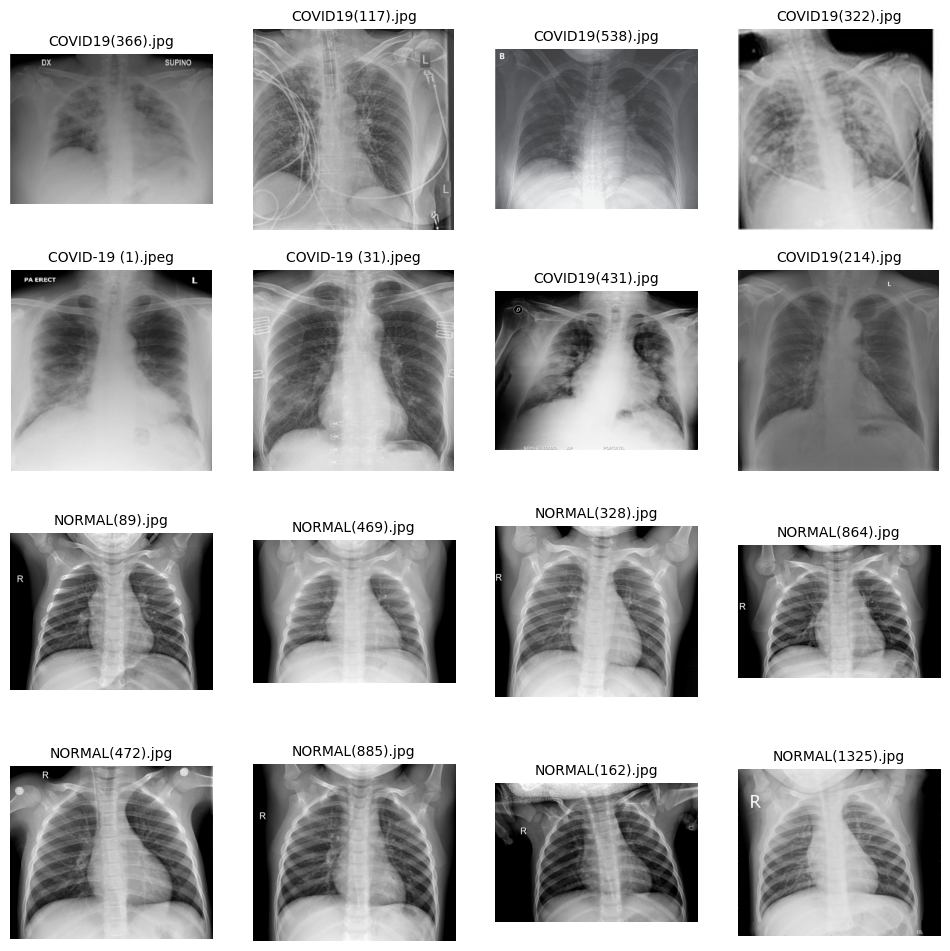

In [22]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mping
#set the number of columns and rows
rows=4
cols=4
#set the figure size
fig=plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pic= [os.path.join(train_covid_dir,filename)for filename in train_covid_names[0:8]]

normal_pic= [os.path.join(train_normal_dir,filename)for filename in train_normal_names[0:8]]

print(covid_pic)
print(normal_pic)

merged_list=covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
   data=img_path.split('/',6)[6]
   sp=plt.subplot(rows,cols,i+1)
   sp.axis('Off')
   img=mping.imread(img_path)
   sp.set_title(data,fontsize=10)
   plt.imshow(img,cmap='gray')
plt.show()


In [25]:
#Data Preprocessing & Augmentation
dgen_train=ImageDataGenerator(rescale=1./255,
                              validation_split=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)
dgen_validation=ImageDataGenerator(rescale=1./255)
dgen_test=ImageDataGenerator(rescale=1./255)

ImageDataGenerator(rescale=1./255)

train_generator=dgen_train.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         subset='training',
                                         batch_size=32,
                                         class_mode='binary')

validation_generator=dgen_train.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         subset='validation',
                                         batch_size=32,
                                         class_mode='binary')

test_generator=dgen_test.flow_from_directory(test_dir,
                                         target_size=(150,150),

                                         batch_size=32,
                                         class_mode='binary')


Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [27]:
train_generator.class_indices
train_generator.image_shape

(150, 150, 3)

In [30]:
#Build Convolutional Neural Network Model
model=Sequential()
model.add(Conv2D(32,(5,5),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(5,5),padding='SAME',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()






Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 37, 37, 64)       

In [31]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


In [43]:
history=model.fit(train_generator,
                  epochs=15,validation_data=validation_generator)

Epoch 1/15
46/46 [==============================] - 174s 4s/step - loss: 0.1038 - accuracy: 0.9655 - val_loss: 0.0903 - val_accuracy: 0.9641
Epoch 2/15
46/46 [==============================] - 168s 4s/step - loss: 0.0927 - accuracy: 0.9683 - val_loss: 0.0800 - val_accuracy: 0.9724
Epoch 3/15
46/46 [==============================] - 167s 4s/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0877 - val_accuracy: 0.9724
Epoch 4/15
46/46 [==============================] - 168s 4s/step - loss: 0.1108 - accuracy: 0.9689 - val_loss: 0.0989 - val_accuracy: 0.9669
Epoch 5/15
46/46 [==============================] - 162s 4s/step - loss: 0.1103 - accuracy: 0.9655 - val_loss: 0.0676 - val_accuracy: 0.9779
Epoch 6/15
46/46 [==============================] - 163s 4s/step - loss: 0.0889 - accuracy: 0.9752 - val_loss: 0.0829 - val_accuracy: 0.9696
Epoch 7/15
46/46 [==============================] - 170s 4s/step - loss: 0.0771 - accuracy: 0.9765 - val_loss: 0.0827 - val_accuracy: 0.9696
Epoch 8/15
46

In [44]:
history. history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

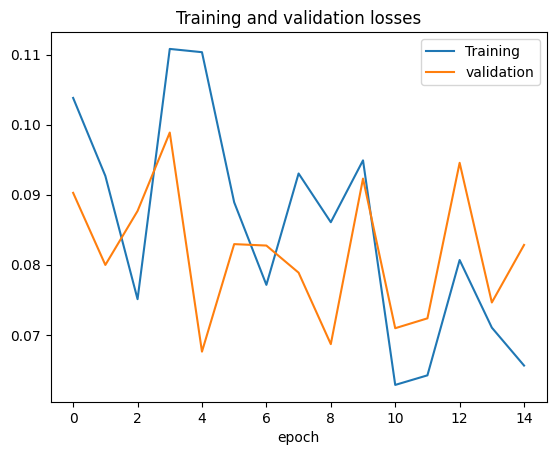

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

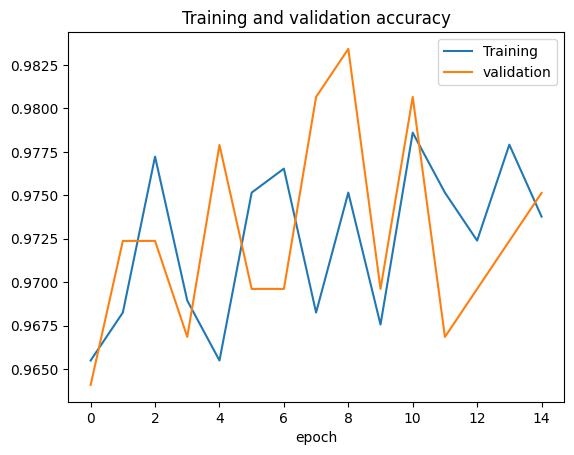

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [47]:
test_loss,test_acc=model.evaluate(test_generator)
print('test loss:{} test acc: {}'.format(test_loss,test_acc))


16/16 [==============================] - 20s 1s/step - loss: 0.0810 - accuracy: 0.9773
test loss:0.08100221306085587 test acc: 0.9772727489471436


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for filename in unloaded,keys():
  img_path='/content/'+filename
  img=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(filename)

  if prediction==0:
    print('covid detected')
  else:
    print("Your report is normal")